In [97]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from method import IV
from simulator import Simulator
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
import pandas as pd
import numpy as np
import quantities as pq
import seaborn as sns
from exana.statistics import plot_xcorr
from tools import savefig, fix_figure, coef_var, corrcoef, set_style, despine
import copy
from IPython.display import display

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


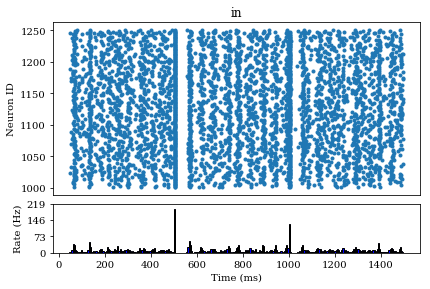

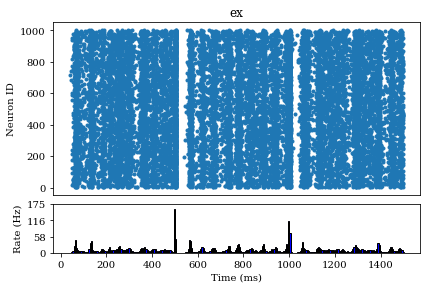

In [5]:
from params_1 import parameters
sim = Simulator(parameters, fname='voltage_dist_AI', data_path='results', 
                stim_N=2, stim_period=500, stim_dist=None)
sim.simulate(state=False, save=False, raster=True)

In [19]:
sim.data.keys()

dict_keys(['nodes', 'epoch', 'stim_amps', 'params', 'spiketrains', 'connections', 'stim_nodes'])

In [102]:
def norm(a):
    a = np.array(a)
    b = a - a.min()
    return b / b.max()

In [104]:
N_ex = 800
stims = sim.data['stim_amps']['ex'].sort_values('amp')
amps = stims.amp.tolist()[:N_ex]
amps = norm(amps)
nodes = stims.node.tolist()[:N_ex]
senders_ex = [t for a,n in zip(amps, nodes) for t in [a] * len(sim.data['spiketrains']['ex'][n-1]['times'])]
spikes_ex = [t for n in nodes for t in sim.data['spiketrains']['ex'][n-1]['times']]

In [105]:
N_in = 250
senders_in = [t for s in sim.data['spiketrains']['in'][:N_in] for t in [s['sender']] * len(s['times'])]
spikes_in = [t for s in sim.data['spiketrains']['in'][:N_in] for t in s['times']]

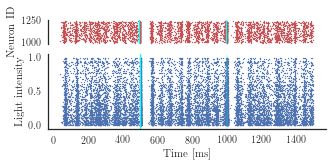

In [112]:
set_style('article')
size = 1
fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw={'height_ratios': [1, 800/250]})
ax1.scatter(spikes_in, senders_in, color='r', s=size)
despine(xticks=False, bottom=True, ax=ax1)
ax1.set_ylabel('Neuron ID')

ax2.scatter(spikes_ex, senders_ex, s=size)
despine(ax=ax2)
ax2.set_ylabel('Light intensity')
ax2.set_xlabel('Time [ms]')

for ax in (ax1, ax2):
    ax.axvspan(500, 502, color='cyan')
    ax.axvspan(1000, 1002, color='cyan')
    
savefig(fig, 'network-raster')

In [95]:
print(len(amps), max(amps))

80 9.9408768200377
